In [1]:
''' Identify important content-level video features for each pipeline.
Challenge: 1. many features are highly correlated. how to reduce redundancy.
           2. identify "all" important features.
           
High-level description of our feature selection (two steps):
            1. Remove highly correlated features.
            2. Identify important features using different kinds of feature selection methods.
'''

' Identify important content-level video features for each pipeline.\nChallenge: 1. many features are highly correlated. how to reduce redundancy.\n           2. identify "all" important features.\n           \nHigh-level description of our feature selection (two steps):\n            1. Remove highly correlated features.\n            2. Identify important features using different kinds of feature selection methods.\n'

In [1]:
import os
from collections import defaultdict
import glob
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_regression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
from sklearn.linear_model import (LinearRegression, Ridge, 
								  Lasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from minepy import MINE
import operator
from mpl_toolkits.mplot3d import Axes3D
sys.path.append('../')
from pipeline_performance_loader import Parser, initialization, read_feature
from sklearn.base import BaseEstimator, TransformerMixin
from VIF import ReduceVIF
import seaborn as sns
from scipy.stats import pearsonr

In [14]:
# Load pipeline performance
all_feature_names, moving, video_to_delete, selected_video, glimpse_video_to_delete = initialization()
path = '/Users/zhujunxiao/Desktop/benchmarking/vldb/data/'
# feature_file = path + 'features_all_type_width_height_filter.csv'
feature_file = path + 'allvideo_features_long_add_width_20_filter.csv'
features = read_feature(feature_file)
video_to_delete = ['nyc', 'russia', 'tw', 'crossroad2','downtown','tw1','bridge','walking'
]
awstream_perf = {}
keys = []
with open('../awstream/awstream_selected_video_resol_0.9_label_merge_add_width_20_filter.csv', 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        dataset_name = line_list[0].replace('_' + 
                       line_list[0].split('_')[-1], '')
        if dataset_name in video_to_delete:
            continue
        key = line_list[0]
        resol = int(line_list[2].replace('p', ''))
        f1 = float(line_list[3])
        bw = float(line_list[4])
        awstream_perf[key] = (bw, f1, resol)
        
target_perf = awstream_perf



tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
tw1
russia
russia
russia
russia
russia
russia
russia
russia
russia
russia
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
crossroad2
c

In [12]:
path = '/Users/zhujunxiao/Desktop/benchmarking/vldb/data/awstream/overfitting_results_30s_30s_label_merge/'
awstream_profile = defaultdict(list)
for file in glob.glob(path + 'awstream_spatial_overfitting_profile*.csv'):
	with open(file, 'r') as f:
		f.readline()
		for line in f:
			line_list = line.strip().split(',')
			key = line_list[0]
			resol = line_list[1]
			f1 = float(line_list[3])
			awstream_profile[key].append(f1)


                


In [27]:
X = []
y = []
feature1 = []
feature2 = []
perf = []

feature_perf_profile = {}
for key in sorted(target_perf.keys()):
    if key not in features:
#         print('feature for {} not found'.format(key))
        continue

    # data cleaning
    if features[key][all_feature_names.index('object_cn_avg')] <= 0:
        continue
    if features[key][all_feature_names.index('velocity_avg')] < 1:
        continue
    if features[key][all_feature_names.index('object_size_avg')] <= 0:
        continue
    thresh1 = 0.05		
#     if np.abs(target_perf[key][1] - 0.9) > thresh1:
#         continue
    if target_perf[key][1] < 0.9:
        continue
    X.append(features[key])
    y.append(target_perf[key][0])        
        
    #************only for AWStream*******
    
#     if  total_object_cn[key] < 200:
#         continue
#     if features[key][all_feature_names.index('percentage')] > 0.8:
#         continue
#     if features[key][0] < 2:
#         continue    
    #************************************
#     feature_perf_profile[key] = [target_perf[key], features[key], awstream_profile[key]]
    
# all_dataset = ['crossroad', 'crossroad2', 'crossroad3', 'crossroad4', 'drift',
#                'driving1', 'driving2', 'highway', 'motorway', 'park', 'trip',
#                'nyc', 'russia', 'russia1', 'tw', 'tw1','jp', 'downtown', 
#                'bridge', 'walking','hw', 'traffic', 'normal_traffic', 'split']
# for dataset in all_dataset:
#     feature_x = []
#     perf_y = []
#     for key in feature_perf_profile.keys():
#         if dataset in key:
#             feature_x.append(feature_perf_profile[key][1])
#             perf_y.append(feature_perf_profile[key][0])
    
#     target_feature_index = all_feature_names.index('object_size_avg')
#     plt.scatter([x[target_feature_index] for x in feature_x], [x[2] for x in perf_y])
#     plt.title(dataset)
#     plt.xlim(0, 0.04)
#     plt.ylim(0,800)
#     plt.show()
    

#     plt.annotate(key, (features[key][all_feature_names.index('object_size_avg')], awstream_profile[key][1]))


# plt.xscale('logit')
 

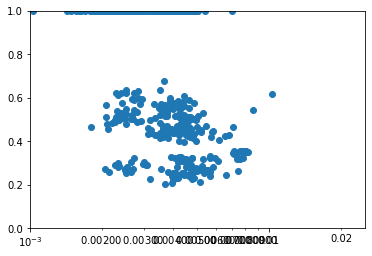

In [28]:
df = pd.DataFrame(X, columns=all_feature_names)

plt.scatter(df['object_size_percentile10'], y)
plt.ylim(0,1)
plt.xlim(0.001,0.025)
plt.xscale('logit')
plt.show()
# for name in all_feature_names:
#     (r, p) = pearsonr(df[name], y)
#     if abs(r) > 0.3:
#         print(name, r, p)
#         plt.scatter(df[name], y)
#         plt.title(name)
        
#         plt.show()


# new_df = df[['percentage','percentage_w_new_object', 'velocity_avg', 'velocity_var', 'arrival_rate_avg', 'arrival_rate_var','object_cn_avg', 'object_cn_var',
#             'object_size_avg','object_size_var', 'total_area_avg','total_area_var']]

# hist = new_df.hist(bins=10, figsize=(12, 12))



In [29]:
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))


def rank_to_dict(ranks, names, order=1):
#     minmax = MinMaxScaler()
#     ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

def topK_index(data, K):
    indices = data.argsort()[-1*K:][::-1]
    return indices, data[indices]

In [30]:
def feature_filtering(df, filter_method='pearson'):
	# remove correlated features
	if filter_method == 'VIF':
		# filter 
		transformer = ReduceVIF(thresh=5)
		df_filtered = transformer.fit_transform(df)
		return df_filtered
	elif filter_method == 'pearson':
		# filter feateures with pearson correlation higher than a thresh
		corr_matrix = df.corr()
		correlated_features = set()
		thresh = 0.8
		for i in range(len(corr_matrix.columns)):
			for j in range(i):
				if abs(corr_matrix.iloc[i, j]) > thresh:
					colname = corr_matrix.columns[i]
					correlated_features.add(colname)
		df_filtered = df.drop(correlated_features, axis=1)
		return df_filtered

	
	else:
		print('Filter method {} does not exist.'.format(filter_method))
		return df

Preprocessing starts (normalization, train_test_split)......
After pearson correlation filtering, remaining features: Index(['object_cn_median', 'object_cn_var', 'object_cn_skewness',
       'object_size_median', 'object_size_mode', 'object_size_skewness',
       'object_size_percentile10', 'arrival_rate_median', 'arrival_rate_var',
       'arrival_rate_skewness', 'velocity_median', 'velocity_mode',
       'velocity_skewness', 'total_area_var', 'total_area_skewness',
       'number_of_object_classes'],
      dtype='object')
ReduceVIF fit
ReduceVIF transform


/usr/local/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping object_cn_var with vif=inf
Dropping object_cn_percentile25 with vif=inf
Dropping object_size_var with vif=inf
Dropping object_size_percentile25 with vif=inf
Dropping arrival_rate_var with vif=inf
Dropping arrival_rate_percentile25 with vif=inf
Dropping velocity_var with vif=inf
Dropping velocity_percentile25 with vif=inf
Dropping total_area_var with vif=inf
Dropping total_area_percentile25 with vif=inf
Dropping total_area_avg with vif=5976.702662243379
Dropping velocity_avg with vif=2699.2823703407544
Dropping object_size_percentile75 with vif=1241.3153116058281
Dropping object_cn_avg with vif=1086.5297541104321
Dropping arrival_rate_avg with vif=905.0902671283999
Dropping velocity_percentile75 with vif=505.6366035209884
Dropping object_size_avg with vif=445.08271784537766
Dropping total_area_percentile75 with vif=402.59780170442417
Dropping object_size_entropy with vif=317.03671772995034
Dropping arrival_rate_percentile75 with vif=250.41350581185344
Dropping object_cn_percent

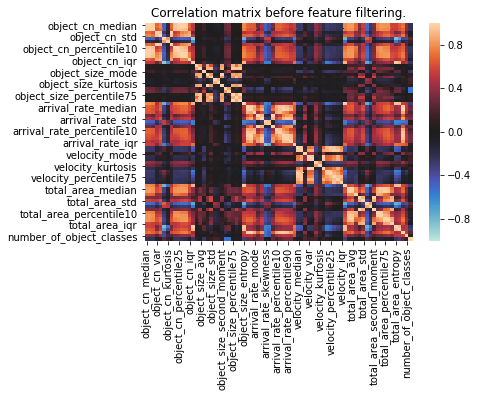

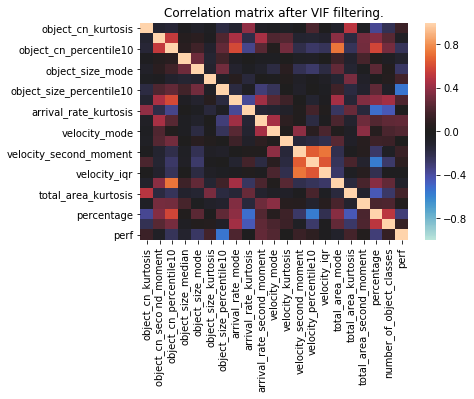

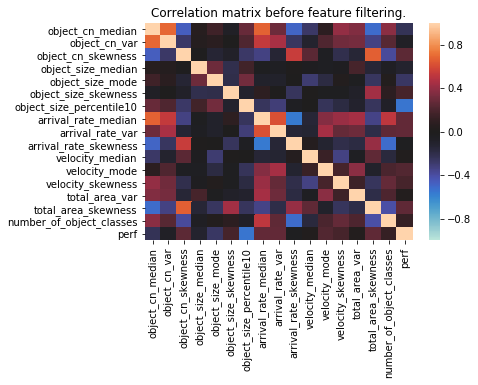

In [31]:
# preprocessing: standardization, and train test split
print('Preprocessing starts (normalization, train_test_split)......')
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                    test_size=0.2, random_state=0)

# remove correlated features, using two methods
df = pd.DataFrame(X_train, columns=all_feature_names)
df_filtered_pearson = feature_filtering(df)
print('After pearson correlation filtering, remaining features:', df_filtered_pearson.columns)
df_filtered_vif = feature_filtering(df, filter_method='VIF')
print('After VIF filtering, remaining features:', df_filtered_vif.columns)

# visualize correlation matrix before and after filtering
df['perf'] = y_train
df_filtered_pearson['perf'] = y_train
df_filtered_vif['perf'] = y_train

# f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
cor = df.corr()
sns.heatmap(cor, vmin=-1, vmax=1, center=0)
plt.title('Correlation matrix before feature filtering.')
plt.show()
cor = df_filtered_vif.corr()
sns.heatmap(cor, vmin=-1, vmax=1, center=0)
plt.title('Correlation matrix after VIF filtering.')
plt.show()
cor = df_filtered_pearson.corr()
sns.heatmap(cor, vmin=-1, vmax=1, center=0)
plt.title('Correlation matrix before feature filtering.')
plt.show()	


In [32]:
# Implement multiple types of feature selection methods. And compare their selected results.

def select_good_features(X, Y, names, n_features_to_select=5):
    ranks = {}
    lr = LinearRegression(normalize=True)
    lr.fit(X, Y)
    ranks["Linear"] = rank_to_dict(np.abs(lr.coef_), names)

    ridge = Ridge(alpha=7)
    ridge.fit(X, Y)
    ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)


    lasso = Lasso(alpha=.05)
    lasso.fit(X, Y)
    ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)


    #stop the search when 5 features are left (they will get equal scores)
    rfe = RFE(lr, n_features_to_select=5)
    rfe.fit(X,Y)
    ranks["RFE"] = rank_to_dict(rfe.ranking_, names, order=-1)

    rf = RandomForestRegressor()
    rf.fit(X,Y)
    ranks["RF"] = rank_to_dict(rf.feature_importances_, names)


    f, pval  = f_regression(X, Y, center=True)
    ranks["Corr."] = rank_to_dict(f, names)

    mine = MINE()
    mic_scores = []
    for i in range(X.shape[1]):
        mine.compute_score(X[:,i], Y)
        m = mine.mic()
        mic_scores.append(m)

    ranks["MIC"] = rank_to_dict(mic_scores, names) 
    r = {}
    for name in names:
        r[name] = round(np.mean([ranks[method][name] 
                                 for method in ranks.keys()]), 2)

    methods = sorted(ranks.keys())
    ranks["Mean"] = r
    methods.append("Mean")

  

    # rank = [np.abs(x) for x in lr.feature_importances_]
    # indicies = topK_index(np.asarray(rank), 3)

    # for i in indicies[0]:
    # 	print(all_feature_names[i])

    return methods, ranks





In [33]:
features = df.drop(['perf'], axis=1)
X = features.as_matrix()
Y = df['perf']
names = features.columns.values
print('The shape of feature matrix:', X.shape)
print('all feature names:', names)
methods, ranks = select_good_features(X, Y, names, n_features_to_select=5)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


The shape of feature matrix: (442, 73)
all feature names: ['object_cn_median' 'object_cn_avg' 'object_cn_mode' 'object_cn_var'
 'object_cn_std' 'object_cn_skewness' 'object_cn_kurtosis'
 'object_cn_seco nd_moment' 'object_cn_percentile10'
 'object_cn_percentile25' 'object_cn_percentile75'
 'object_cn_percentile90' 'object_cn_iqr' 'object_cn_entropy'
 'object_size_median' 'object_size_avg' 'object_size_mode'
 'object_size_var' 'object_size_std' 'object_size_skewness'
 'object_size_kurtosis' 'object_size_second_moment'
 'object_size_percentile10' 'object_size_percentile25'
 'object_size_percentile75' 'object_size_percentile90' 'object_size_iqr'
 'object_size_entropy' 'arrival_rate_median' 'arrival_rate_avg'
 'arrival_rate_mode' 'arrival_rate_var' 'arrival_rate_std'
 'arrival_rate_skewness' 'arrival_rate_kurtosis'
 'arrival_rate_second_moment' 'arrival_rate_percentile10'
 'arrival_rate_percentile25' 'arrival_rate_percentile75'
 'arrival_rate_percentile90' 'arrival_rate_iqr' 'arrival_rate_

In [34]:
print("%30s\t%s" % ('Feature name', "\t".join(methods)))
for name in names:
    print("%30s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))) 

                  Feature name	Corr.	Lasso	Linear	MIC	RF	RFE	Ridge	Mean
              object_cn_median	25.0	0.0	0.02	0.29	0.0	54	0.03	11.33
                 object_cn_avg	23.13	0.0	0.22	0.35	0.01	6	0.03	4.25
                object_cn_mode	24.73	0.0	0.0	0.27	0.0	60	0.0	12.14
                 object_cn_var	1.82	0.0	202882454283.83	0.29	0.0	45	0.02	28983207761.57
                 object_cn_std	2.37	0.0	0.15	0.29	0.0	9	0.02	1.69
            object_cn_skewness	30.79	0.0	0.0	0.25	0.02	67	0.01	14.01
            object_cn_kurtosis	9.56	0.0	0.06	0.22	0.01	23	0.03	4.7
      object_cn_seco nd_moment	1.82	0.0	202882454283.82	0.29	0.0	49	0.02	28983207762.14
        object_cn_percentile10	26.68	0.0	0.09	0.29	0.0	7	0.02	4.87
        object_cn_percentile25	27.97	0.0	1751001571434.04	0.26	0.0	8	0.01	250143081638.61
        object_cn_percentile75	20.73	0.0	2241410568219.62	0.26	0.0	34	0.0	320201509753.52
        object_cn_percentile90	17.41	0.0	0.18	0.26	0.0	10	0.06	3.99
                 object_cn_iqr	2

In [35]:
for method in methods:
    new_rank = {k: v for k, v in sorted(ranks[method].items(), key=lambda item: item[1], reverse=True)}
    rank_iterator = iter(new_rank)
    print('Selected features of method {}:'.format(method))
    for i in range(3):
        selected_feature = next(rank_iterator)
        feature_importance = new_rank[selected_feature]
        print(selected_feature, feature_importance)


Selected features of method Corr.:
object_size_percentile10 184.66
object_size_percentile25 167.93
arrival_rate_std 55.54
Selected features of method Lasso:
object_size_percentile10 0.05
object_size_percentile25 0.04
arrival_rate_percentile90 0.04
Selected features of method Linear:
object_cn_percentile75 2241410568219.62
object_cn_percentile25 1751001571434.04
total_area_percentile75 1144856756289.15
Selected features of method MIC:
object_size_percentile10 0.49
object_size_percentile25 0.47
object_size_median 0.43
Selected features of method RF:
object_size_percentile10 0.24
object_size_percentile25 0.11
object_size_median 0.06
Selected features of method RFE:
object_size_median 69
total_area_mode 68
object_cn_skewness 67
Selected features of method Ridge:
velocity_entropy 0.11
arrival_rate_std 0.08
object_cn_entropy 0.07
Selected features of method Mean:
object_cn_percentile75 320201509753.52
object_cn_percentile25 250143081638.61
total_area_percentile75 163550965190.9


In [36]:
features = df_filtered_pearson.drop(['perf'], axis=1)
X = features.as_matrix()
Y = df_filtered_pearson['perf']
names = features.columns.values
print('The shape of feature matrix:', X.shape)
print('all feature names:', names)
methods, ranks = select_good_features(X, Y, names, n_features_to_select=5)


The shape of feature matrix: (442, 16)
all feature names: ['object_cn_median' 'object_cn_var' 'object_cn_skewness'
 'object_size_median' 'object_size_mode' 'object_size_skewness'
 'object_size_percentile10' 'arrival_rate_median' 'arrival_rate_var'
 'arrival_rate_skewness' 'velocity_median' 'velocity_mode'
 'velocity_skewness' 'total_area_var' 'total_area_skewness'
 'number_of_object_classes']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [37]:
print("%30s\t%s" % ('Feature name', "\t".join(methods)))
for name in names:
    print("%30s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))) 

                  Feature name	Corr.	Lasso	Linear	MIC	RF	RFE	Ridge	Mean
              object_cn_median	25.0	0.0	0.19	0.29	0.02	1	0.17	3.81
                 object_cn_var	1.82	0.0	0.03	0.29	0.03	4	0.03	0.89
            object_cn_skewness	30.79	0.0	0.05	0.25	0.04	1	0.05	4.6
            object_size_median	4.76	0.0	0.01	0.43	0.13	10	0.01	2.19
              object_size_mode	33.29	0.0	0.02	0.3	0.04	7	0.02	5.81
          object_size_skewness	15.76	0.0	0.01	0.24	0.03	9	0.01	3.58
      object_size_percentile10	184.66	0.11	0.04	0.49	0.34	1	0.05	26.67
           arrival_rate_median	34.44	0.01	0.16	0.32	0.02	1	0.14	5.16
              arrival_rate_var	34.81	0.0	0.0	0.27	0.07	11	0.0	6.59
         arrival_rate_skewness	0.54	0.0	0.02	0.25	0.04	3	0.02	0.55
               velocity_median	0.39	0.0	0.02	0.27	0.06	5	0.02	0.82
                 velocity_mode	22.85	0.0	0.0	0.35	0.02	12	0.0	5.03
             velocity_skewness	15.13	0.0	0.04	0.27	0.03	1	0.04	2.36
                total_area_var	0.58	0.0	0.02	0.3

In [38]:
for method in methods:
    new_rank = {k: v for k, v in sorted(ranks[method].items(), key=lambda item: item[1], reverse=True)}
    rank_iterator = iter(new_rank)
    print('Selected features of method {}:'.format(method))
    for i in range(3):
        selected_feature = next(rank_iterator)
        feature_importance = new_rank[selected_feature]
        print(selected_feature, feature_importance)

Selected features of method Corr.:
object_size_percentile10 184.66
arrival_rate_var 34.81
arrival_rate_median 34.44
Selected features of method Lasso:
object_size_percentile10 0.11
arrival_rate_median 0.01
total_area_skewness 0.01
Selected features of method Linear:
object_cn_median 0.19
arrival_rate_median 0.16
object_cn_skewness 0.05
Selected features of method MIC:
object_size_percentile10 0.49
object_size_median 0.43
velocity_mode 0.35
Selected features of method RF:
object_size_percentile10 0.34
object_size_median 0.13
arrival_rate_var 0.07
Selected features of method RFE:
velocity_mode 12
arrival_rate_var 11
object_size_median 10
Selected features of method Ridge:
object_cn_median 0.17
arrival_rate_median 0.14
object_cn_skewness 0.05
Selected features of method Mean:
object_size_percentile10 26.67
arrival_rate_var 6.59
object_size_mode 5.81


In [39]:
features = df_filtered_vif.drop(['perf'], axis=1)
X = features.as_matrix()
Y = df_filtered_vif['perf']
names = features.columns.values
print('The shape of feature matrix:', X.shape)
print('all feature names:', names)
methods, ranks = select_good_features(X, Y, names, n_features_to_select=5)


The shape of feature matrix: (442, 20)
all feature names: ['object_cn_kurtosis' 'object_cn_seco nd_moment' 'object_cn_percentile10'
 'object_size_median' 'object_size_mode' 'object_size_kurtosis'
 'object_size_percentile10' 'arrival_rate_mode' 'arrival_rate_kurtosis'
 'arrival_rate_second_moment' 'velocity_mode' 'velocity_kurtosis'
 'velocity_second_moment' 'velocity_percentile10' 'velocity_iqr'
 'total_area_mode' 'total_area_kurtosis' 'total_area_second_moment'
 'percentage' 'number_of_object_classes']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [40]:
print("%30s\t%s" % ('Feature name', "\t".join(methods)))
for name in names:
    print("%30s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))) 

                  Feature name	Corr.	Lasso	Linear	MIC	RF	RFE	Ridge	Mean
            object_cn_kurtosis	9.56	0.0	0.02	0.22	0.02	8	0.02	2.55
      object_cn_seco nd_moment	1.82	0.0	0.01	0.29	0.02	14	0.01	2.31
        object_cn_percentile10	26.68	0.0	0.1	0.29	0.01	1	0.09	4.02
            object_size_median	4.76	0.0	0.01	0.43	0.08	13	0.01	2.61
              object_size_mode	33.29	0.0	0.01	0.3	0.03	11	0.01	6.38
          object_size_kurtosis	14.42	0.0	0.03	0.24	0.03	6	0.03	2.96
      object_size_percentile10	184.66	0.11	0.07	0.49	0.35	1	0.08	26.68
             arrival_rate_mode	19.67	0.0	0.08	0.31	0.01	1	0.07	3.02
         arrival_rate_kurtosis	0.03	0.0	0.04	0.2	0.03	5	0.03	0.76
    arrival_rate_second_moment	34.81	0.0	0.04	0.27	0.07	4	0.04	5.6
                 velocity_mode	22.85	0.0	0.0	0.35	0.01	15	0.0	5.46
             velocity_kurtosis	0.0	0.0	0.01	0.24	0.02	12	0.01	1.75
        velocity_second_moment	8.76	0.0	0.07	0.32	0.04	2	0.06	1.61
         velocity_percentile10	3.84	0.0	0.01	0.33

In [41]:
for method in methods:
    new_rank = {k: v for k, v in sorted(ranks[method].items(), key=lambda item: item[1], reverse=True)}
    rank_iterator = iter(new_rank)
    print('Selected features of method {}:'.format(method))
    for i in range(3):
        selected_feature = next(rank_iterator)
        feature_importance = new_rank[selected_feature]
        print(selected_feature, feature_importance)

Selected features of method Corr.:
object_size_percentile10 184.66
percentage 45.82
arrival_rate_second_moment 34.81
Selected features of method Lasso:
object_size_percentile10 0.11
percentage 0.01
object_cn_kurtosis 0.0
Selected features of method Linear:
percentage 0.11
object_cn_percentile10 0.1
arrival_rate_mode 0.08
Selected features of method MIC:
object_size_percentile10 0.49
object_size_median 0.43
velocity_mode 0.35
Selected features of method RF:
object_size_percentile10 0.35
object_size_median 0.08
velocity_percentile10 0.08
Selected features of method RFE:
total_area_second_moment 16
velocity_mode 15
object_cn_seco nd_moment 14
Selected features of method Ridge:
percentage 0.11
object_cn_percentile10 0.09
object_size_percentile10 0.08
Selected features of method Mean:
object_size_percentile10 26.68
percentage 6.77
object_size_mode 6.38


In [42]:
from scipy.stats import pearsonr

features = df.drop(['perf'], axis=1)
X = features.as_matrix()
Y = df['perf']
names = features.columns.values
correlation_thresh = 0.3
correlated_features = []
for name in names:
    (r, p) = pearsonr(df[name], df['perf'])
    if np.abs(r) > correlation_thresh:
        correlated_features.append((name,r))
correlated_features.sort(key=lambda x: x[1], reverse=True)
print(correlated_features)
selected_features = [correlated_features[0][0]]
for feature in correlated_features[1:]:
    (r, p) = pearsonr(df[feature[0]], df[correlated_features[0][0]])
    if np.abs(r) <= 0.8:
        selected_features.append(feature[0])
print('Final selected feature:', selected_features)

[('arrival_rate_std', 0.33478781856538836), ('arrival_rate_percentile90', 0.3229717858894907), ('arrival_rate_iqr', 0.3104793798515038), ('arrival_rate_percentile75', 0.3036066655304597), ('percentage', -0.3071158394287686), ('object_size_entropy', -0.31092950132397984), ('velocity_entropy', -0.3157617857679296), ('object_size_percentile25', -0.5255771171115959), ('object_size_percentile10', -0.5437110782009567)]
Final selected feature: ['arrival_rate_std', 'percentage', 'object_size_entropy', 'velocity_entropy', 'object_size_percentile25', 'object_size_percentile10']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
